# Notebook to use fine tuned model

In [128]:
import numpy as np
import pandas as pd

## PATH TO IMAGE FOLDER
PREFIX = '/kaggle/input/sample-images-val/'   

## PATH TO DATA CSV
PATH = '/kaggle/working/sample_df.csv'

In [129]:
import os

import requests
from transformers import BlipProcessor, BlipForQuestionAnswering
from datasets import load_dataset
import torch
from PIL import Image
from torch.utils.data import DataLoader
from tqdm import tqdm
import pickle

model = BlipForQuestionAnswering.from_pretrained("ritika-kumar/finetuned-blip-vizwiz")
processor = BlipProcessor.from_pretrained("ritika-kumar/finetuned-blip-vizwiz")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

torch.cuda.empty_cache()
torch.manual_seed(42)

In [130]:
df = pd.read_csv(PATH)

In [131]:
import matplotlib.pyplot as plt
from PIL import Image

def visualize_vqa_result(processor, model, dataset, index, prefix):
    """
    Visualizes the VQA results by displaying the image, question, actual answer, and predicted answer.

    Args:
        processor: BLIP processor for encoding images and text.
        model: Fine-tuned BLIP model.
        dataset: Dataset containing "image", "question", and "answer".
        index: index of the sample to visualize.
        prefix: for path

    Returns:
        None
    """
    # Extract data for the given index
    image_path = prefix + dataset["image"][index]
    question = dataset["question"][index]
    actual_answer = dataset["most_confident_answer"][index]

    # Load and display the image
    image = Image.open(image_path).convert("RGB")
    plt.imshow(image)
    plt.axis("off")
    plt.title("Test Image")
    plt.show()

    # Generate prediction
    inputs = processor(images=image, text=question, return_tensors="pt").to("cuda")
    output = model.generate(**inputs)
    predicted_answer = processor.decode(output[0], skip_special_tokens=True)

    # Print question, actual answer, and predicted answer
    print(f"Question: {question}")
    print(f"Actual Answer: {actual_answer}")
    print(f"Predicted Answer: {predicted_answer}")


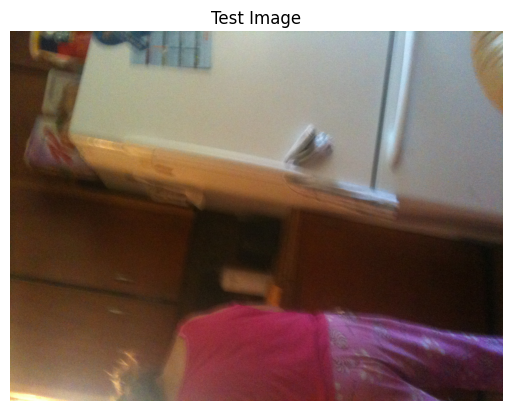

Question: Is this a woman?>
Actual Answer: yes
Predicted Answer: yes


/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [132]:
visualize_vqa_result(processor, model, df, index=2, prefix = PREFIX)